In [99]:
import numpy as np 
import pandas as pd 
from pandas import Timestamp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [100]:
df = pd.read_csv('/content/UCI_Credit_Card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [101]:
print(df.shape)


(30000, 25)


In [102]:
count_nan = df.isna().sum().sum()

print ('Count of NaN: ' + str(count_nan))


Count of NaN: 0


In [103]:
print(df.shape)


(30000, 25)


#Preprocessing and Cleaning 

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [105]:
#rename some colums 
df = df.rename(columns={'default.payment.next.month': 'default_payment', 
                        'PAY_0': 'PAY_1'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


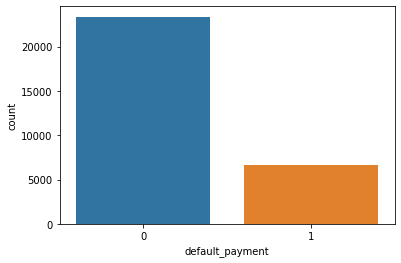

In [106]:
sns.countplot(df['default_payment'])

Categorical variables

In [107]:
df['LIMIT_BAL']

0         20000.0
1        120000.0
2         90000.0
3         50000.0
4         50000.0
           ...   
29995    220000.0
29996    150000.0
29997     30000.0
29998     80000.0
29999     50000.0
Name: LIMIT_BAL, Length: 30000, dtype: float64

In [108]:
value = df['LIMIT_BAL'].quantile(0.98)
df = df.replace(np.inf, value)

In [109]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [110]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [111]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

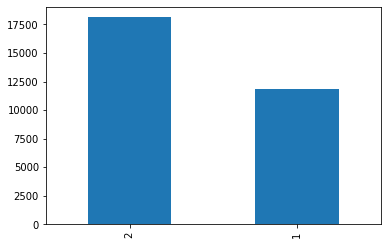

In [112]:
df['SEX'].value_counts().plot(kind = 'bar')

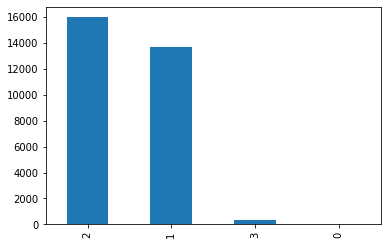

In [113]:
df['MARRIAGE'].value_counts().plot(kind = 'bar')

Numerical variables

In [114]:
def draw_histogram(df, variables, nun_rows, num_cols):
    fig=plt.figure()
    for i, n in enumerate(variables):
        ax=fig.add_subplot(nun_rows,num_cols,i+1)
        df[n].hist(bins=10,ax=ax)
        ax.set_title(n)
    fig.tight_layout()  
    plt.show()

In [115]:
payment =  df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]


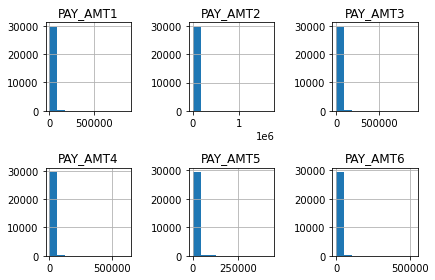

In [116]:
draw_histogram(payment, payment.columns, 2, 3)

In [117]:
bill = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

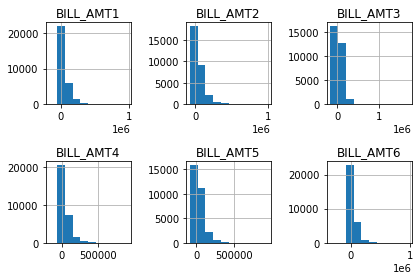

In [118]:
draw_histogram(bill,bill,2,3)

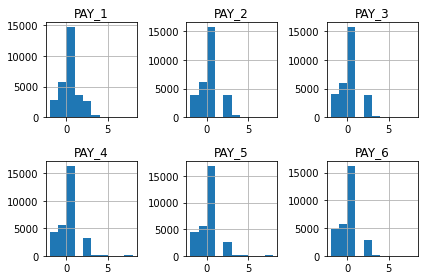

In [119]:
notpay = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histogram(notpay, notpay.columns, 2, 3)


In [120]:
# fig, ax = plt.subplots(1, 2, figsize=(15,4))
# sns.histplot(data=df, x='SEX', ax=ax[0])
# ax[0].set_title("Histogram")
# sns.boxplot(data=df, x='SEX', ax=ax[1])
# ax[1].set_title("Boxplot");

In [121]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment'],
      dtype='object')

In [122]:
#calculte the correlation between columns
def correlation(Column1, Column2):
    result = df.groupby([Column1, Column2]).size().unstack()
    result['perc'] = (result[result.columns[1]]/(result[result.columns[0]] + result[result.columns[1]]))
    return result

In [123]:
correlation('SEX','default_payment')

default_payment,0,1,perc
SEX,,,
1,9015,2873,0.241672
2,14349,3763,0.207763


In [124]:
correlation('MARRIAGE','default_payment')

default_payment,0,1,perc
MARRIAGE,,,
0,49,5,0.092593
1,10453,3206,0.234717
2,12623,3341,0.209283
3,239,84,0.260062


In [125]:
correlation('EDUCATION','default_payment')

default_payment,0,1,perc
EDUCATION,,,
0,14.0,NaN,NaN
1,8549.0,2036.0,0.192348
2,10700.0,3330.0,0.237349
3,3680.0,1237.0,0.251576
4,116.0,7.0,0.056911
5,262.0,18.0,0.064286
6,43.0,8.0,0.156863


In [126]:
df.loc[df['MARRIAGE'] == 0, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [253]:
correlation('MARRIAGE','default_payment')

default_payment,0,1,perc
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,288,89,0.236074


In [127]:
correlation('EDUCATION', 'SEX')

SEX,1,2,perc
EDUCATION,,,
0,8,6,0.428571
1,4354,6231,0.588663
2,5374,8656,0.616964
3,1990,2927,0.595282
4,42,81,0.658537
5,95,185,0.660714
6,25,26,0.509804


In [128]:
correlation('MARRIAGE', 'SEX')

SEX,1,2,perc
MARRIAGE,,,
1,5190,8469,0.620031
2,6553,9411,0.589514
3,145,232,0.615385


In [129]:
fill = (df['PAY_1'] == -2) | (df['PAY_1'] == -1) | (df['PAY_1'] == 0)
df.loc[fill,'PAY_1'] = 0
fill = (df['PAY_2'] == -2) | (df['PAY_2'] == -1) | (df['PAY_2'] == 0)
df.loc[fill, 'PAY_2'] = 0
fill = (df['PAY_3'] == -2) | (df['PAY_3'] == -1) | (df['PAY_3'] == 0)
df.loc[fill, 'PAY_3'] = 0
fill = (df['PAY_4'] == -2) | (df['PAY_4'] == -1) | (df['PAY_4'] == 0)
df.loc[fill, 'PAY_4'] = 0
fill = (df['PAY_5'] == -2) | (df['PAY_5'] == -1) | (df['PAY_5'] == 0)
df.loc[fill, 'PAY_5'] = 0
fill = (df['PAY_6'] == -2) | (df['PAY_6'] == -1) | (df['PAY_6'] == 0)
df.loc[fill, 'PAY_6'] = 0
notpay = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]


In [130]:
fill = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fill, 'EDUCATION'] = 4


In [252]:
correlation('EDUCATION', 'SEX')

SEX,1,2,perc
EDUCATION,,,
1,4354,6231,0.588663
2,5374,8656,0.616964
3,1990,2927,0.595282
4,170,298,0.636752


In [131]:
# then calulate the correlation after replace some vaules 
correlation('EDUCATION','default_payment')

default_payment,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


In [132]:
correlation('MARRIAGE', 'SEX')

SEX,1,2,perc
MARRIAGE,,,
1,5190,8469,0.620031
2,6553,9411,0.589514
3,145,232,0.615385


In [133]:
df.loc[df['PAY_1'] > 0, 'PAY_1'] = 1
df.loc[df['PAY_2'] > 0, 'PAY_2'] = 1
df.loc[df['PAY_3'] > 0, 'PAY_3'] = 1
df.loc[df['PAY_4'] > 0, 'PAY_4'] = 1
df.loc[df['PAY_5'] > 0, 'PAY_5'] = 1
df.loc[df['PAY_6'] > 0, 'PAY_6'] = 1

In [134]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,1,20000.0,2,2,1,24,1,1,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,1,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,0,0,0,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,1,1,1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


###**Feature Engineering**


In [135]:
df['SEX_MAR'] = df['SEX']*df['MARRIAGE']


In [136]:
correlation('SEX_MAR','default_payment')

default_payment,0,1,perc
SEX_MAR,,,
1,3844,1346,0.259345
2,11677,3345,0.222673
3,103,42,0.289655
4,7555,1856,0.197216
6,185,47,0.202586


In [137]:
df['SEX_MAR']=0
df.loc[((df['SEX']==1) & (df['MARRIAGE']==1)), 'SEX_MAR']=1
df.loc[((df['SEX']==1) & (df['MARRIAGE']==2)), 'SEX_MAR']=2
df.loc[((df['SEX']==1) & (df['MARRIAGE']==3)), 'SEX_MAR']=3
df.loc[((df['SEX']==2) & (df['MARRIAGE']==1)), 'SEX_MAR']=4
df.loc[((df['SEX']==2) & (df['MARRIAGE']==2)), 'SEX_MAR']=5
df.loc[((df['SEX']==2) & (df['MARRIAGE']==3)), 'SEX_MAR']=6

In [138]:
correlation('SEX_MAR','default_payment')

default_payment,0,1,perc
SEX_MAR,,,
1,3844,1346,0.259345
2,5068,1485,0.226614
3,103,42,0.289655
4,6609,1860,0.219625
5,7555,1856,0.197216
6,185,47,0.202586


In [139]:
df['AGE']

0        24
1        26
2        34
3        37
4        57
         ..
29995    39
29996    43
29997    37
29998    41
29999    46
Name: AGE, Length: 30000, dtype: int64

In [140]:
# df['agebin']=0
# df.loc[((df['AGE']>20)& (df['AGE']<30)),'agebin']=1
# df.loc[((df['AGE']>30)& (df['AGE']<40)),'agebin']=2
# df.loc[((df['AGE']>40)& (df['AGE']<50)),'agebin']=3
# df.loc[((df['AGE']>50)& (df['AGE']<60)),'agebin']=4
# df.loc[((df['AGE']>60)& (df['AGE']<70)),'agebin']=5
# df.loc[((df['AGE']>70)& (df['AGE']<81)),'agebin']=6

In [141]:
bins=[20,29,39,49,59,69,81]
bin_num=[1,2,3,4,5,6]
df['agebin']=pd.cut(df['AGE'],bins,labels=bin_num)

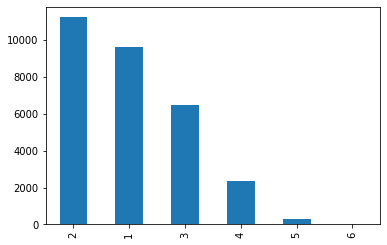

In [142]:
df['agebin'].value_counts().plot(kind = 'bar')

In [143]:
df['agebin1']=pd.qcut(df['AGE'],6)

In [144]:
df['agebin1'].value_counts

<bound method IndexOpsMixin.value_counts of 0        (20.999, 26.0]
1        (20.999, 26.0]
2          (30.0, 34.0]
3          (34.0, 39.0]
4          (45.0, 79.0]
              ...      
29995      (34.0, 39.0]
29996      (39.0, 45.0]
29997      (34.0, 39.0]
29998      (39.0, 45.0]
29999      (45.0, 79.0]
Name: agebin1, Length: 30000, dtype: category
Categories (6, interval[float64, right]): [(20.999, 26.0] < (26.0, 30.0] < (30.0, 34.0] <
                                           (34.0, 39.0] < (39.0, 45.0] < (45.0, 79.0]]>

In [145]:
df['agebin1']= pd.qcut(df['AGE'],6,labels=bin_num )

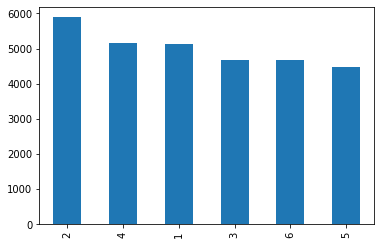

In [146]:
df['agebin1'].value_counts().plot(kind = 'bar')

In [147]:
df['agebin']=pd.cut(df['AGE'],6,labels=[1,2,3,4,5,6])
df['agebin']=pd.to_numeric(df['agebin'])
df.loc[(df['agebin']==6),'agebin']=5

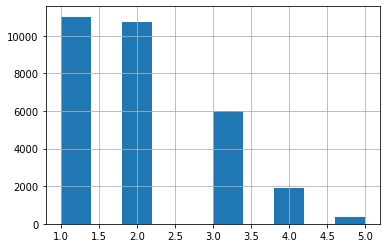

In [148]:
df['agebin'].hist()

In [149]:
correlation('agebin','default_payment')

default_payment,0,1,perc
agebin,,,
1,8542,2471,0.224371
2,8524,2189,0.204331
3,4606,1399,0.232973
4,1449,481,0.249223
5,243,96,0.283186


In [150]:
correlation('agebin','SEX')

SEX,1,2,perc
agebin,,,
1,3842,7171,0.651140
2,4363,6350,0.592738
3,2587,3418,0.569192
4,917,1013,0.524870
5,179,160,0.471976


In [151]:
df['agebin']

0        1
1        1
2        2
3        2
4        4
        ..
29995    2
29996    3
29997    2
29998    3
29999    3
Name: agebin, Length: 30000, dtype: int64

In [152]:
df['SEX_AGE']=0
df.loc[((df['SEX']==1)&(df['agebin']==1)),'SEX_AGE']=1
df.loc[((df['SEX']==1)&(df['agebin']==2)),'SEX_AGE']=2
df.loc[((df['SEX']==1)&(df['agebin']==3)),'SEX_AGE']=3
df.loc[((df['SEX']==1)&(df['agebin']==4)),'SEX_AGE']=4
df.loc[((df['SEX']==1)&(df['agebin']==5)),'SEX_AGE']=5
df.loc[((df['SEX']==2)&(df['agebin']==1)),'SEX_AGE']=6
df.loc[((df['SEX']==2)&(df['agebin']==2)),'SEX_AGE']=7
df.loc[((df['SEX']==2)&(df['agebin']==3)),'SEX_AGE']=8
df.loc[((df['SEX']==2)&(df['agebin']==4)),'SEX_AGE']=9
df.loc[((df['SEX']==2)&(df['agebin']==5)),'SEX_AGE']=10

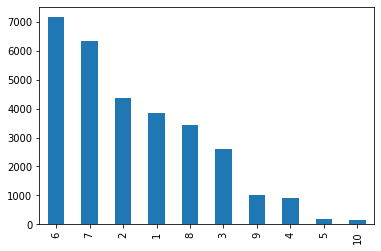

In [153]:
df['SEX_AGE'].value_counts().plot(kind='bar')

In [154]:
correlation('SEX_AGE','default_payment')

default_payment,0,1,perc
SEX_AGE,,,
1,2929,913,0.237637
2,3350,1013,0.232180
3,1939,648,0.250483
4,666,251,0.273719
5,131,48,0.268156
6,5613,1558,0.217264
7,5174,1176,0.185197
8,2667,751,0.219719
9,783,230,0.227048


 if PAY, BILL_AMT and PAY_AMT are 0,are not talking about a client

In [155]:
df['client1']=1
df['client2']=1
df['client3']=1
df['client4']=1
df['client5']=1
df['client6']=1
df.loc[((df['PAY_1']==0)&(df['BILL_AMT1']==0)&(df['PAY_AMT1']==0)),'client1']=0
df.loc[((df['PAY_2']==0)&(df['BILL_AMT2']==0)&(df['PAY_AMT2']==0)),'client1']=0
df.loc[((df['PAY_3']==0)&(df['BILL_AMT3']==0)&(df['PAY_AMT3']==0)),'client1']=0
df.loc[((df['PAY_4']==0)&(df['BILL_AMT4']==0)&(df['PAY_AMT4']==0)),'client1']=0
df.loc[((df['PAY_5']==0)&(df['BILL_AMT5']==0)&(df['PAY_AMT5']==0)),'client1']=0
df.loc[((df['PAY_6']==0)&(df['BILL_AMT6']==0)&(df['PAY_AMT6']==0)),'client1']=0

In [156]:
pd.Series([df[df['client1']==1]['default_payment'].count(),
           df[df['client2']==1]['default_payment'].count(),
           df[df['client3']==1]['default_payment'].count(),
           df[df['client4']==1]['default_payment'].count(),
           df[df['client5']==1]['default_payment'].count(),
           df[df['client6']==1]['default_payment'].count()],[1,2,3,4,5,6])

1    25555
2    30000
3    30000
4    30000
5    30000
6    30000
dtype: int64

the expenses of a client

In [157]:
df['AvgExp1'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3'])) +
                 (df['BILL_AMT2'] - (df['BILL_AMT3'] - df['PAY_AMT2'])) +
                 (df['BILL_AMT1'] - (df['BILL_AMT2'] - df['PAY_AMT1']))) / 5) / df['LIMIT_BAL']



In [158]:
df['AvgExp2'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3'])) +
                 (df['BILL_AMT2'] - (df['BILL_AMT3'] - df['PAY_AMT2']))) / 4) / df['LIMIT_BAL']



In [159]:
df['AvgExp3'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3']))) / 3) / df['LIMIT_BAL']



In [160]:
df['AvgExp4'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4']))) / 2) / df['LIMIT_BAL']


In [161]:
df['AvgExp5'] = ((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5']))) / df['LIMIT_BAL']


In [162]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,client2,client3,client4,client5,client6,AvgExp1,AvgExp2,AvgExp3,AvgExp4,AvgExp5
0,1,20000.0,2,2,1,24,1,1,0,0,...,1,1,1,1,1,0.046020,0.047387,0.011483,0.000000,0.000000
1,2,120000.0,2,2,2,26,0,1,0,0,...,1,1,1,1,1,0.004035,0.003050,0.003947,0.004213,0.001617
2,3,90000.0,2,2,2,34,0,0,0,0,...,1,1,1,1,1,0.043796,0.008272,0.003741,0.004344,0.004433
3,4,50000.0,2,2,1,37,0,0,0,0,...,1,1,1,1,1,0.099324,0.120370,0.154087,0.009360,0.009620
4,5,50000.0,1,2,1,57,0,0,0,0,...,1,1,1,1,1,0.191424,0.214545,0.242620,0.114980,0.014080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,1,1,1,1,1,0.195016,0.238506,0.311265,0.181980,0.092077
29996,29997,150000.0,1,3,2,43,0,0,0,0,...,1,1,1,1,1,0.021564,0.024135,0.028064,0.030360,0.034600
29997,29998,30000.0,1,2,2,37,1,1,1,0,...,1,1,1,1,1,0.082720,0.101658,0.128900,0.128683,0.107500
29998,29999,80000.0,1,3,1,41,1,0,0,0,...,1,1,1,1,1,0.236970,0.277850,0.347617,0.367000,0.198437


In [163]:
df['default_payment']

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default_payment, Length: 30000, dtype: int64

In [164]:
df['C1'] = (df.LIMIT_BAL - df.BILL_AMT1) / df.LIMIT_BAL
df['C2'] = (df.LIMIT_BAL - df.BILL_AMT2) / df.LIMIT_BAL
df['C3'] = (df.LIMIT_BAL - df.BILL_AMT3) / df.LIMIT_BAL
df['C4'] = (df.LIMIT_BAL - df.BILL_AMT4) / df.LIMIT_BAL
df['C5'] = (df.LIMIT_BAL - df.BILL_AMT5) / df.LIMIT_BAL
df['C6'] = (df.LIMIT_BAL - df.BILL_AMT6) / df.LIMIT_BAL

In [165]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,AvgExp2,AvgExp3,AvgExp4,AvgExp5,C1,C2,C3,C4,C5,C6
0,1,20000.0,2,2,1,24,1,1,0,0,...,0.047387,0.011483,0.000000,0.000000,0.804350,0.844900,0.965550,1.000000,1.000000,1.000000
1,2,120000.0,2,2,2,26,0,1,0,0,...,0.003050,0.003947,0.004213,0.001617,0.977650,0.985625,0.977650,0.972733,0.971208,0.972825
2,3,90000.0,2,2,2,34,0,0,0,0,...,0.008272,0.003741,0.004344,0.004433,0.675122,0.844144,0.849344,0.840767,0.833911,0.827233
3,4,50000.0,2,2,1,37,0,0,0,0,...,0.120370,0.154087,0.009360,0.009620,0.060200,0.035340,0.014180,0.433720,0.420820,0.409060
4,5,50000.0,1,2,1,57,0,0,0,0,...,0.214545,0.242620,0.114980,0.014080,0.827660,0.886600,0.283300,0.581200,0.617080,0.617380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,0.238506,0.311265,0.181980,0.092077,0.141145,0.123568,0.052886,0.599982,0.858014,0.927364
29996,29997,150000.0,1,3,2,43,0,0,0,0,...,0.024135,0.028064,0.030360,0.034600,0.988780,0.987813,0.976653,0.940140,0.965400,1.000000
29997,29998,30000.0,1,2,2,37,1,1,1,0,...,0.101658,0.128900,0.128683,0.107500,0.881167,0.888133,0.908067,0.304067,0.313933,0.354767
29998,29999,80000.0,1,3,1,41,1,0,0,0,...,0.277850,0.347617,0.367000,0.198437,1.020563,0.020262,0.046200,0.340325,0.851812,0.388200


In [166]:
count_nan = df.isna().sum().sum()

print ('Count of NaN: ' + str(count_nan))


Count of NaN: 0


In [167]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

#Modeling using Machine Learning

In [168]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from xgboost import XGBClassifier

In [169]:
# X = df.drop('default_payment',1)
# y = df['default_payment']

# x = df.sample(frac=1) # shuffle -> fixes boosting errors
# y = df.iloc[:,[0]] #extract label from last column
# X = df.drop(['default_payment'],axis=1) #drop last column from X

In [170]:
features = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3', 
            'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
            'SEX_MAR', 'agebin', 'SEX_AGE', 'AvgExp5', 'AvgExp4',
            'AvgExp3', 'AvgExp2', 'AvgExp1', 'C5',
            'C4', 'C3', 'C2','C1']
y = df['default_payment'].copy() 
X = df[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [171]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [172]:
df_train = X_train.join(y_train)
df_maj = df_train[df_train.default_payment==0]
df_min = df_train[df_train.default_payment==1]


training samples

In [173]:
#upsample 
df_upsampled = resample(df_maj, replace=True, n_samples=18677, random_state=42) 
df_upsampled = pd.concat([df_maj, df_min])


In [174]:
X_upsampled = df_upsampled.drop(['default_payment'], axis= 1)
y_upsampled = df_upsampled.default_payment

In [175]:
#downsample
df_downsampled = resample(df_min, replace=False,n_samples=5323,random_state=587) 
df_downsampled = pd.concat([df_maj, df_min])


In [176]:
X_downsampled = df_downsampled.drop(['default_payment'], axis = 1)
y_downsampled = df_downsampled.default_payment


In [177]:
sm = SMOTE()
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)


In [178]:
count_nan = df.isna().sum().sum()

print ('Count of NaN: ' + str(count_nan))


Count of NaN: 0


###Random Forest

In [179]:
#normal train
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.81      0.98      0.88      4687
     class 1       0.67      0.15      0.25      1313

    accuracy                           0.80      6000
   macro avg       0.74      0.57      0.57      6000
weighted avg       0.78      0.80      0.75      6000



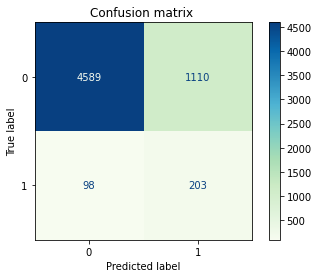

In [180]:
ConfusionMatrixDisplay(metrics.confusion_matrix(pred,y_test)).plot(cmap='GnBu')
plt.title("Confusion matrix ")
plt.show()

In [181]:
# Upsample training
clf_up = RandomForestClassifier(max_depth=2, random_state=0)
clf_up.fit(X_upsampled, y_upsampled)
pred_up = clf_up.predict(X_test)
print(classification_report(y_test, pred_up, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.81      0.98      0.88      4687
     class 1       0.68      0.15      0.25      1313

    accuracy                           0.80      6000
   macro avg       0.74      0.57      0.57      6000
weighted avg       0.78      0.80      0.74      6000



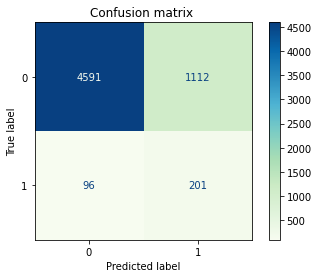

In [182]:
ConfusionMatrixDisplay(metrics.confusion_matrix(pred_up,y_test)).plot(cmap='GnBu')
plt.title("Confusion matrix ")
plt.show()

In [183]:
# Downsample training
clf_down = RandomForestClassifier(max_depth=2, random_state=0)
clf_down.fit(X_downsampled, y_downsampled)
pred_down = clf_down.predict(X_test)
print(classification_report(y_test, pred_down, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.81      0.98      0.88      4687
     class 1       0.68      0.15      0.25      1313

    accuracy                           0.80      6000
   macro avg       0.74      0.57      0.57      6000
weighted avg       0.78      0.80      0.74      6000



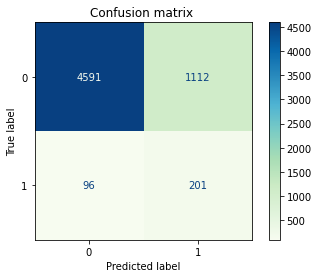

In [184]:
ConfusionMatrixDisplay(metrics.confusion_matrix(pred_down,y_test)).plot(cmap='GnBu')
plt.title("Confusion matrix ")
plt.show()

In [185]:
# SMOTE training
clf_SMOTE = RandomForestClassifier(max_depth=2, random_state=0)
clf_SMOTE.fit(X_SMOTE,y_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test)
print(classification_report(y_test, pred_SMOTE, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.88      0.70      0.78      4687
     class 1       0.38      0.66      0.48      1313

    accuracy                           0.69      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.69      0.71      6000



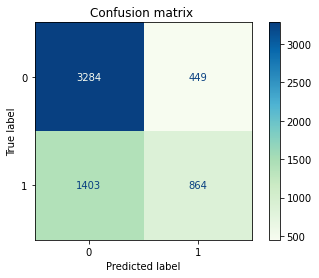

In [186]:
ConfusionMatrixDisplay(metrics.confusion_matrix(pred_SMOTE,y_test)).plot(cmap='GnBu')
plt.title("Confusion matrix ")
plt.show()

##Adaboost

In [187]:
#normal train
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.83      0.95      0.88      4687
     class 1       0.62      0.31      0.41      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.78      0.81      0.78      6000



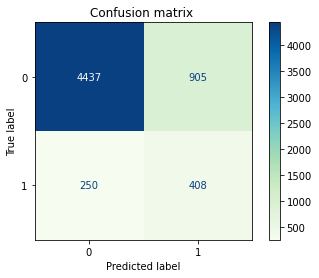

In [188]:
ConfusionMatrixDisplay(metrics.confusion_matrix(pred,y_test)).plot(cmap='GnBu')
plt.title("Confusion matrix ")
plt.show()

In [189]:
# Upsample training
clf_up = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_up.fit(X_upsampled, y_upsampled)
pred_up = clf_up.predict(X_test)
print(classification_report(y_test, pred_up, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.83      0.95      0.88      4687
     class 1       0.62      0.31      0.41      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.78      0.81      0.78      6000



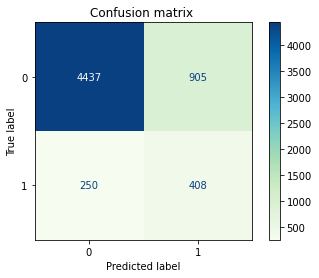

In [190]:
ConfusionMatrixDisplay(metrics.confusion_matrix(pred_up,y_test)).plot(cmap='GnBu')
plt.title("Confusion matrix ")
plt.show()

In [191]:
# Downsample training
clf_down = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_down.fit(X_downsampled, y_downsampled)
pred_down = clf_down.predict(X_test)
print(classification_report(y_test, pred_down, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.83      0.95      0.88      4687
     class 1       0.62      0.31      0.41      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.78      0.81      0.78      6000



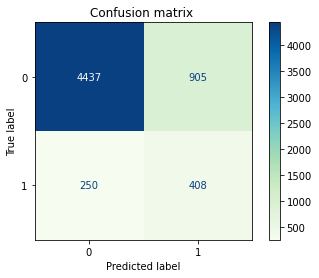

In [192]:
ConfusionMatrixDisplay(metrics.confusion_matrix(pred_down,y_test)).plot(cmap='GnBu')
plt.title("Confusion matrix ")
plt.show()

In [193]:
# SMOTE training
clf_SMOTE = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_SMOTE.fit(X_SMOTE, y_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test)
print(classification_report(y_test, pred_SMOTE, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.86      0.77      0.81      4687
     class 1       0.41      0.56      0.47      1313

    accuracy                           0.72      6000
   macro avg       0.63      0.66      0.64      6000
weighted avg       0.76      0.72      0.74      6000



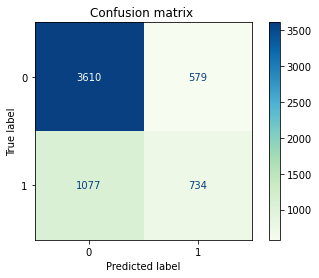

In [194]:
ConfusionMatrixDisplay(metrics.confusion_matrix(pred_SMOTE,y_test)).plot(cmap='GnBu')
plt.title("Confusion matrix ")
plt.show()

##GradientBoosting

In [195]:
#normal train
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.83      0.95      0.89      4687
     class 1       0.63      0.32      0.42      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.79      0.81      0.78      6000



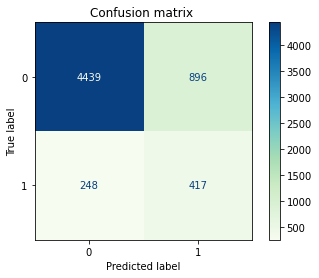

In [196]:
ConfusionMatrixDisplay(metrics.confusion_matrix(pred,y_test)).plot(cmap='GnBu')
plt.title("Confusion matrix ")
plt.show()

In [197]:
# Upsample training
clf_up = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_upsampled, y_upsampled)
pred_up = clf_up.predict(X_test)
print(classification_report(y_test, pred_up, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.83      0.95      0.89      4687
     class 1       0.63      0.32      0.42      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.79      0.81      0.78      6000



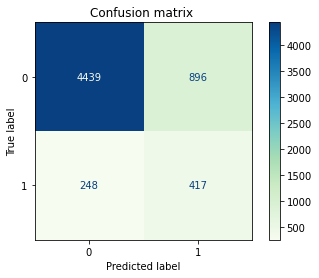

In [198]:
ConfusionMatrixDisplay(metrics.confusion_matrix(pred_up,y_test)).plot(cmap='GnBu')
plt.title("Confusion matrix ")
plt.show()

In [199]:
# Downsample training
clf_down = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_downsampled, y_downsampled)
pred_down = clf_down.predict(X_test)
print(classification_report(y_test, pred_down, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.83      0.95      0.89      4687
     class 1       0.63      0.32      0.42      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.79      0.81      0.78      6000



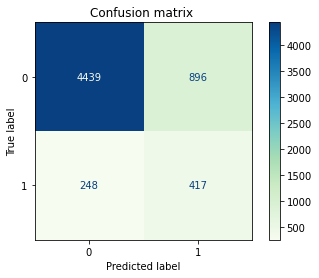

In [200]:
ConfusionMatrixDisplay(metrics.confusion_matrix(pred_down,y_test)).plot(cmap='GnBu')
plt.title("Confusion matrix ")
plt.show()

In [201]:
# SMOTE training
clf_SMOTE = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_SMOTE, y_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test)
print(classification_report(y_test, pred_SMOTE, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.86      0.77      0.81      4687
     class 1       0.40      0.54      0.46      1313

    accuracy                           0.72      6000
   macro avg       0.63      0.66      0.64      6000
weighted avg       0.76      0.72      0.74      6000



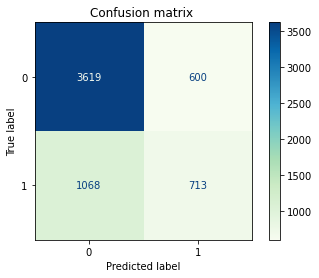

In [202]:
ConfusionMatrixDisplay(metrics.confusion_matrix(pred_SMOTE,y_test)).plot(cmap='GnBu')
plt.title("Confusion matrix ")
plt.show()

# **LightGBM Classifier**

##Normal sample training

In [203]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
# predict the results
y_pred=clf.predict(X_test)
# view accuracy
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.8142


In [204]:
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.8442


In [205]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.8442
Test set score: 0.8142


In [206]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.37      0.47      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.68      6000
weighted avg       0.79      0.81      0.80      6000



##Upsample training

In [207]:
clf2 = lgb.LGBMClassifier()
clf2.fit(X_upsampled, y_upsampled)

LGBMClassifier()

In [208]:
# predict the results
y_pred_2=clf2.predict(X_test)
# view accuracy
accuracy_up=accuracy_score(y_pred_2, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_2)))

LightGBM Model accuracy score: 0.8142


In [209]:
y_pred_train_2 = clf2.predict(X_upsampled)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_upsampled, y_pred_train_2)))


Training-set accuracy score: 0.8442


In [210]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_upsampled, y_upsampled)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.8442
Test set score: 0.8142


In [211]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.37      0.47      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.68      6000
weighted avg       0.79      0.81      0.80      6000



##downsample training

In [212]:
clf3 = lgb.LGBMClassifier()
clf3.fit(X_downsampled, y_downsampled)
# predict the results
y_pred_3=clf3.predict(X_test)
# view accuracy
accuracy_up=accuracy_score(y_pred_3, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_3)))

LightGBM Model accuracy score: 0.8142


In [213]:
y_pred_train_3 = clf3.predict(X_downsampled)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_downsampled, y_pred_train_3)))


Training-set accuracy score: 0.8442


In [214]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf3.score(X_downsampled, y_downsampled)))

print('Test set score: {:.4f}'.format(clf3.score(X_test, y_test)))

Training set score: 0.8442
Test set score: 0.8142


In [215]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.37      0.47      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.68      6000
weighted avg       0.79      0.81      0.80      6000



##SMOTE training

In [216]:
clf4 = lgb.LGBMClassifier()
clf4.fit(X_SMOTE, y_SMOTE)
# predict the results
y_pred_4=clf4.predict(X_test)
# view accuracy
accuracy_up=accuracy_score(y_pred_4, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_4)))

LightGBM Model accuracy score: 0.7688


In [217]:
y_pred_train_4 = clf4.predict(X_SMOTE)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_SMOTE, y_pred_train_4)))


Training-set accuracy score: 0.8385


In [218]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf4.score(X_SMOTE, y_SMOTE)))

print('Test set score: {:.4f}'.format(clf4.score(X_test, y_test)))

Training set score: 0.8385
Test set score: 0.7688


In [219]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_4))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4687
           1       0.47      0.51      0.49      1313

    accuracy                           0.77      6000
   macro avg       0.67      0.67      0.67      6000
weighted avg       0.77      0.77      0.77      6000



# GridSearch

In [236]:
parm_grid = {'max_depth': [7,11],'learning_rate':[0.2,0.5],'eval_metric':['mlogloss'] }


In [237]:
xgb = XGBClassifier()
grid = GridSearchCV(estimator=xgb, param_grid=parm_grid , cv = 10 )
grid_result_xgb_1 =grid.fit(X_train, y_train)

In [238]:
print(grid_result_xgb_1.best_score_, grid_result_xgb_1.best_params_)

0.8084583333333335 {'eval_metric': 'mlogloss', 'learning_rate': 0.2, 'max_depth': 7}


In [239]:
model1=grid_result_xgb_1.best_estimator_

In [240]:
y_pred_xgb_1=model1.predict(X_test)
accuracy_score(y_test,y_pred_xgb_1)

0.8118333333333333

In [241]:
print(classification_report(y_test, y_pred_xgb_1))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89      4687
           1       0.62      0.37      0.46      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.68      6000
weighted avg       0.79      0.81      0.79      6000



upsample

In [243]:
xgb = XGBClassifier()
grid = GridSearchCV(estimator=xgb, param_grid=parm_grid , cv = 10 )
grid_result_xgb_2 =grid.fit(X_upsampled, y_upsampled)
print(grid_result_xgb_2.best_score_, grid_result_xgb_2.best_params_)

0.8084583333333335 {'eval_metric': 'mlogloss', 'learning_rate': 0.2, 'max_depth': 7}


In [244]:
model2=grid_result_xgb_2.best_estimator_
y_pred_xgb_2=model2.predict(X_test)
accuracy_score(y_test,y_pred_xgb_2)

0.8118333333333333

In [245]:
print(classification_report(y_test, y_pred_xgb_2))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89      4687
           1       0.62      0.37      0.46      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.68      6000
weighted avg       0.79      0.81      0.79      6000



downsampled

In [246]:
xgb = XGBClassifier()
grid = GridSearchCV(estimator=xgb, param_grid=parm_grid , cv = 10 )
grid_result_xgb_3 =grid.fit(X_downsampled, y_downsampled)
print(grid_result_xgb_3.best_score_, grid_result_xgb_3.best_params_)

0.8084583333333335 {'eval_metric': 'mlogloss', 'learning_rate': 0.2, 'max_depth': 7}


In [247]:
model3=grid_result_xgb_3.best_estimator_
y_pred_xgb_3=model3.predict(X_test)
accuracy_score(y_test,y_pred_xgb_3)

0.8118333333333333

In [248]:
print(classification_report(y_test, y_pred_xgb_3))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89      4687
           1       0.62      0.37      0.46      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.68      6000
weighted avg       0.79      0.81      0.79      6000



SMOTE

In [249]:
xgb = XGBClassifier()
grid = GridSearchCV(estimator=xgb, param_grid=parm_grid , cv = 10 )
grid_result_xgb_4 =grid.fit(X_SMOTE, y_SMOTE)
print(grid_result_xgb_4.best_score_, grid_result_xgb_4.best_params_)

0.8460495013601875 {'eval_metric': 'mlogloss', 'learning_rate': 0.2, 'max_depth': 11}


In [250]:
model4=grid_result_xgb_4.best_estimator_
y_pred_xgb_4=model4.predict(X_test)
accuracy_score(y_test,y_pred_xgb_4)

0.7765

In [251]:
print(classification_report(y_test, y_pred_xgb_4))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4687
           1       0.49      0.45      0.47      1313

    accuracy                           0.78      6000
   macro avg       0.67      0.66      0.66      6000
weighted avg       0.77      0.78      0.77      6000



#pycaret

In [ ]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 6.9 MB/s 
     |████████████████████████████████| 10.4 MB 45.3 MB/s 
     |████████████████████████████████| 1.7 MB 21.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 44.2 MB/s 
     |████████████████████████████████| 6.8 MB 57.7 MB/s 
     |████████████████████████████████| 56 kB 5.4 MB/s 
     |████████████████████████████████| 25.9 MB 91.3 MB/s 
     |████████████████████████████████| 262 kB 81.0 MB/s 
     |████████████████████████████████| 88 kB 8.0 MB/s 
     |████████████████████████████████| 17.9 MB 176 kB/s 
     |████████████████████████████████| 134 kB 64.4 MB/s 
     |████████████████████████████████| 1.3 MB 47.9 MB/s 
     |████████████████████████████████|

In [ ]:
from pycaret.datasets import get_data

In [ ]:
dataset = get_data("credit")

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [ ]:
dataset.shape

(24000, 24)

In [ ]:
dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [ ]:
data = dataset.sample(frac = 0.95,random_state=0)

In [ ]:
data.shape

(22800, 24)

In [ ]:
#solution a problem of random index
data.reset_index(inplace = True,drop = True)

In [ ]:
data.reset_index(inplace = True,drop = True)

In [ ]:
print("Data for Modeling:" + str(data.shape))
print("Unseen_data for Modeling:" + str(data.shape))


Data for Modeling:(22800, 24)
Unseen_data for Modeling:(22800, 24)


In [ ]:
pip install markupsafe==2.0.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install numba --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numba-0.56.0-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.5 MB)
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires numba<0.55, but you have numba 0.56.0 which is incompatible.


In [ ]:
#setup the enviroment
import jinja2
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
clf01 = setup(data=data , target = "default",session_id= 123)

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22800, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8217,0.0000,0.3591,0.6784,0.4693,0.3741,0.4017,0.047
lda,Linear Discriminant Analysis,0.8207,0.7675,0.3808,0.6595,0.4826,0.3834,0.4047,0.296
gbc,Gradient Boosting Classifier,0.8197,0.7824,0.3611,0.6654,0.4677,0.3705,0.3958,5.729
lightgbm,Light Gradient Boosting Machine,0.8194,0.7782,0.3705,0.6588,0.4739,0.3751,0.3980,0.427
ada,Ada Boost Classifier,0.8172,0.7737,0.3308,0.6718,0.4430,0.3483,0.3799,1.305
rf,Random Forest Classifier,0.8168,0.7653,0.3699,0.6456,0.4700,0.3691,0.3902,3.160
et,Extra Trees Classifier,0.8075,0.7415,0.3782,0.5985,0.4632,0.3532,0.3671,2.630
dummy,Dummy Classifier,0.7803,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.032
lr,Logistic Regression,0.7802,0.6381,0.0000,0.0000,0.0000,-0.0003,-0.0027,1.023
knn,K Neighbors Classifier,0.7543,0.6064,0.1780,0.3737,0.2409,0.1162,0.1275,0.909


In [ ]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
dt = create_model("dt")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7180,0.5973,0.3829,0.3641,0.3733,0.1915,0.1916
1,0.7174,0.6064,0.4086,0.3695,0.3881,0.2050,0.2054
2,0.7193,0.6116,0.4171,0.3744,0.3946,0.2126,0.2131
3,0.7243,0.6023,0.3846,0.3760,0.3803,0.2030,0.2031
4,0.7224,0.6175,0.4302,0.3832,0.4054,0.2251,0.2258
5,0.7456,0.6324,0.4302,0.4230,0.4266,0.2631,0.2631
6,0.7262,0.6075,0.3932,0.3812,0.3871,0.2109,0.2109
7,0.7343,0.6208,0.4188,0.4005,0.4095,0.2382,0.2383
8,0.7206,0.6174,0.4302,0.3804,0.4037,0.2222,0.2229


In [ ]:
knn = create_model("knn")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7469,0.6036,0.1629,0.3393,0.2201,0.0907,0.0995
1,0.7513,0.5845,0.1771,0.3626,0.2380,0.1099,0.1200
2,0.7431,0.5853,0.1657,0.3295,0.2205,0.0865,0.0938
3,0.7575,0.6188,0.1994,0.3977,0.2657,0.1392,0.1511
4,0.7613,0.6190,0.1937,0.4096,0.2631,0.1419,0.1561
5,0.7619,0.6361,0.2194,0.4208,0.2884,0.1621,0.1745
6,0.7619,0.6184,0.1994,0.4142,0.2692,0.1473,0.1614
7,0.7469,0.5931,0.1282,0.3147,0.1822,0.0629,0.0718
8,0.7481,0.5893,0.1396,0.3289,0.1960,0.0747,0.0844


In [ ]:
rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8033,0.7558,0.3343,0.5909,0.4270,0.3191,0.3380
1,0.8089,0.7640,0.3571,0.6098,0.4505,0.3442,0.3623
2,0.8277,0.7559,0.3629,0.7095,0.4802,0.3896,0.4211
3,0.8152,0.7491,0.3476,0.6489,0.4527,0.3535,0.3785
4,0.8127,0.7670,0.3789,0.6215,0.4708,0.3650,0.3815
5,0.8227,0.7664,0.4017,0.6589,0.4991,0.3990,0.4170
6,0.8152,0.7665,0.3704,0.6373,0.4685,0.3660,0.3857
7,0.8271,0.7802,0.4074,0.6777,0.5089,0.4118,0.4314
8,0.8133,0.7760,0.3590,0.6332,0.4582,0.3556,0.3766


In [ ]:
tune_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8076,0.7521,0.3257,0.6162,0.4262,0.3236,0.3473
1,0.8095,0.7430,0.2971,0.6420,0.4062,0.3106,0.3433
2,0.8189,0.7493,0.3314,0.6784,0.4453,0.3520,0.3843
3,0.8227,0.7333,0.3134,0.7237,0.4374,0.3511,0.3946
4,0.8221,0.7415,0.3561,0.6831,0.4682,0.3738,0.4024
5,0.8058,0.7335,0.3390,0.6041,0.4343,0.3281,0.3480
6,0.8164,0.7800,0.3134,0.6790,0.4288,0.3367,0.3725
7,0.8252,0.7604,0.3618,0.6978,0.4765,0.3840,0.4139
8,0.8195,0.7316,0.3647,0.6632,0.4706,0.3727,0.3969


In [ ]:
unseen_pred = predict_model(tune_rf,data = data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8221,0.7567,0.3256,0.7108,0.4467,0.3577,0.3965
